### Introduction
Purpose of this jupyter notebook is to introduce the basic use of pyCallisto library. pyCallisto library has following functions avaialable<br><br>
1) spectrogram:  plot a spectrogram from input fits image<br>
2) appendTimeAxis: join two spectrograms in time axis<br>
3) sliceTimeAxis: crop a part of spectrogram in timeaxis<br>
4) sliceFrequencyAxis: crop a part of spectrogram in frequencyaxis<br>
5) subtractBackground: estimate and subtract the background level from spectrogram<br>
6) meanLightCurve: Generate a lightcurve from spectrogram, time vs count, by collapsing along timeaxis<br>
7) meanSpectrum: Generate a spectrum from spectrogram, frequency vs count, by collapsing along frequencyaxis<br>
8) lightCurve: Generate a lightcurve from spectrogram, time vs count, for given  frequency/band<br>
9) spectrum: Generate a spectrum from spectrogram, frequency vs count, for given time<br>
10) universalPlot: Generate a composite plot with spectrogram, meanLightCurve and meanSpectrum<br>


### Prerequisite<br>
Before using this library following software should be installed<br>
1) Python3.X<br>
2) numpy<br>
3) matplotlib<br>
4) astropy<br>

### Installing pyCallisto<br>
No need to install, just keep a copy of "pyCallisto.py" and "pyCallistoUtils.py" in the current directory. Alternatively you can keep it anywhere and append that directory with command sys.path.append('/path/to/pyCallisto/file')  before importing.


In [1]:
import sys
sys.path.append('../src/') 
import pyCallisto as pyc
import pyCallistoUtils as utils

In [2]:
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt

In [3]:
#fits data files path
fits1_path = '../data/IISERP_20151104_031152_59.fit'
fits2_path = '../data/IISERP_20151104_032652_59.fit'

First, you need to create a pyCallisto object from fits file, on this pyCallisto object all the functions listed above can be applied.

In [4]:
fits1 = pyc.pyCallisto.fromFile(fits1_path)
print("Type of the fits1 is %s"%type(fits1))

Type of the fits1 is <class 'pyCallisto.pyCallisto'>


### 1) spectrogram:

Spectroram functions directly works on a pyCallisto object, as one we have created in above command. Then there are optional arguments like xtick is a interval of xticks in mins, blevel is the background level etc.
It returns a matplotlib plt object which can be saved to image or further manupulated if user needs to.

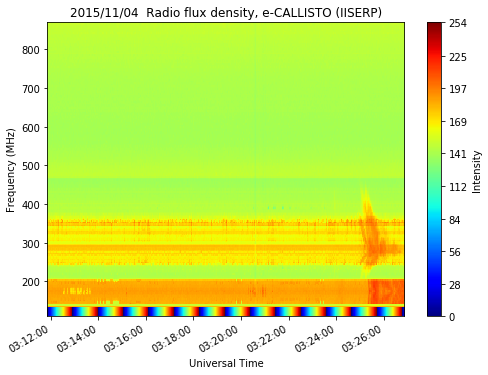

In [5]:
plot1 = fits1.spectrogram()

Let us plot another image using few more input arguments.<br>
Note that the frequency od xticks is changed and the colorbar starts from 10.

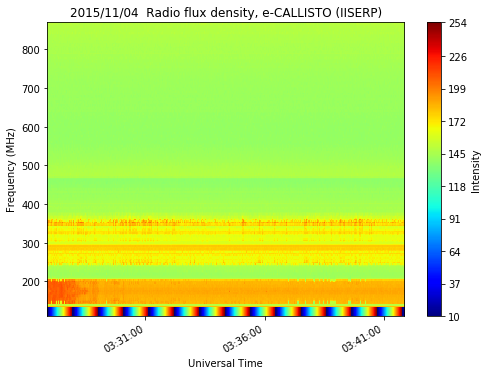

In [6]:
fits2 = pyc.pyCallisto.fromFile(fits2_path)
plot2 = fits2.spectrogram(xtick=5, blevel=10)

using this plot object you can save fig in any image format of your choice like png, eps , jpeg etc.
Please note that in jupyter notebook the object is returned to notebook so you may get and blanck image if you save it notebook. IF you want to save image displayed here, simply right click and save image with 'save as' option.

In [7]:
plot2.savefig("first_plot.png")

<Figure size 432x288 with 0 Axes>

### 2) appendTimeAxis

appendTimeAxis appends/joins anoather fits file to existing pycallisto objects/spectrograms in time axis. These two spectrograms should be continuous in time.<br>
Here we create one pycallisto object and pass the second fits files path to append to a method/function operating on this first pyCallisto object.So in the following example fits1 is a "<class 'pyCallisto.pyCallisto'\>" object and fits2_path is simply path of another fits file.<br>

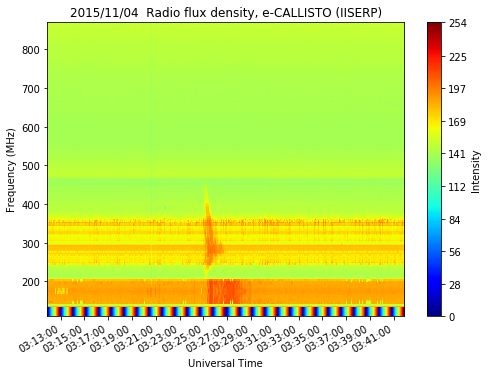

In [8]:
joined = fits1.appendTimeAxis(fits2_path)
plt = joined.spectrogram()
plt.savefig("joined.png")

### 3) sliceTimeAxis

sliceTimeAxis takes two inputs, start time and end time. It will slice and keep only the part between the two timestamps provided.
In the above joined image we can see an interesting burst/feture at middle, so let us crop and keep that much part only in time axis.

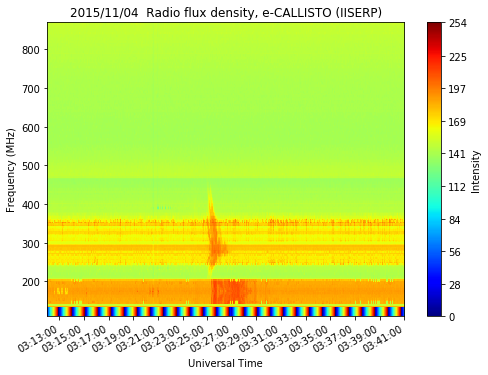

In [9]:
time_sliced = joined.sliceTimeAxis("03:12:00", "03:41:00")
plt = time_sliced.spectrogram()
plt.savefig("time_sliced.png")

### 4) sliceFrequencyAxis

sliceFrequencyAxis function takes two inputs, start frequency and end frequency.
In the above image, at the bottom we see a stripe of alternating colors, which is some intereference at low frequencies. To remove this let us slice spectrogram.

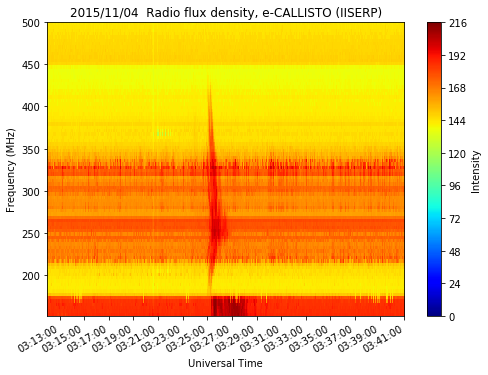

In [10]:
freq_sliced = time_sliced.sliceFrequencyAxis(150, 500)
plt = freq_sliced.spectrogram()
plt.savefig('frequency_sliced.png')

### 5) subtractBackground

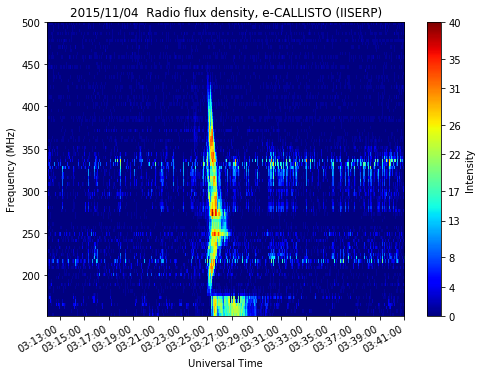

In [11]:
background_subtracted = freq_sliced.subtractBackground()
plt = background_subtracted.spectrogram()
plt.savefig("background_subtracted.png")

# 6) meanLightCurve

meanLightCurve takes two inputs, image name to be saved and grid.<br>
It generates the lightcurve by collapsing/ summing each columns of the 2d spectrogram along time axis  and taking a mean of the sum.

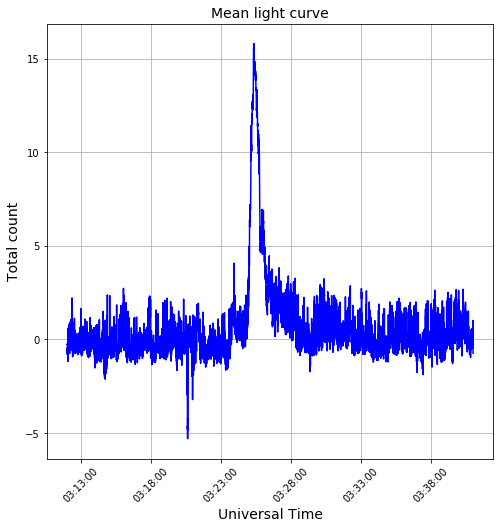

In [12]:
background_subtracted.meanLightCurve(outImage ="mean_Light_Curve.png", grid=True)

# 7) meanSpectrum

meanSpectrum takes two inputs the imagename to be saved and grid.<br>
It generates the spectrum by collapsing/ summing each row of the 2d spectrogram along frequency axis and taking a mean of the sum.

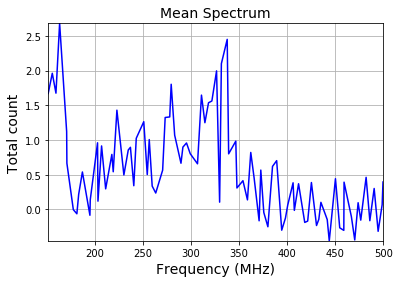

In [13]:
background_subtracted.meanSpectrum(outImage ="mean_spectrum.png", grid=True)

# 8) lightCurve

lightcurve generates a lightcurve at given frequency.<br>
It takes three inputs, the frequency at which we need to plot lightcurve, output image name and grid.

<Figure size 432x288 with 0 Axes>

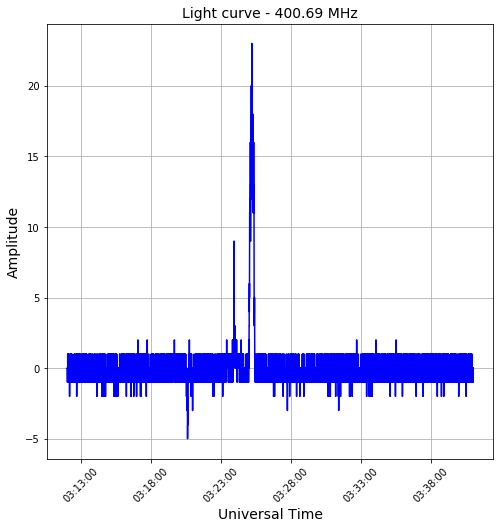

In [14]:
background_subtracted.lightCurve(400, outImage ="Lightcurve1.png", grid=True)

# 9) spectrum

spectrum generates a spectrum at given time.<br>
It takes four inputs, the date , the time at which we need to plot a spectrum, output image name and grid.

<Figure size 432x288 with 0 Axes>

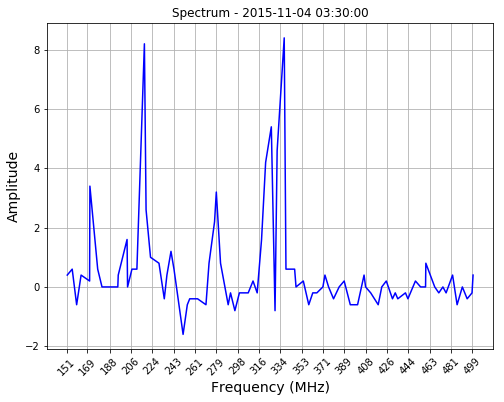

In [15]:
background_subtracted.spectrum( '2015/11/04','03:30:00', outImage ="singletimespectrum.png", grid=True)

# 10) universalPlot

universal plot plots a spectrogram along with meanspectrum and mean lightcurve as the projections to give a "universal" view of the spectrogram.<br>
It takes two inputs, the name of the output image to be saved and Title of the plot.

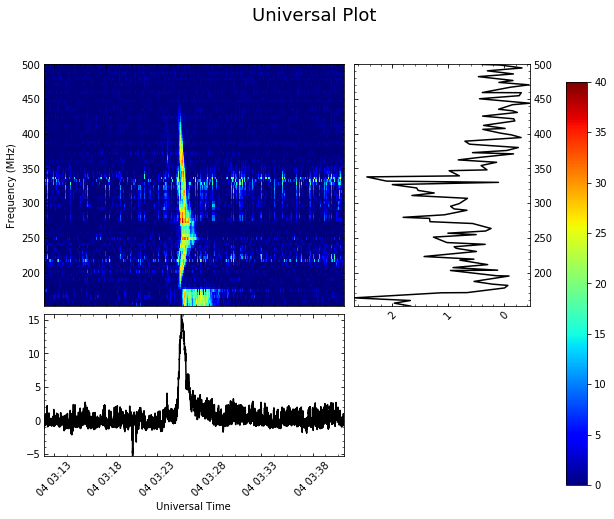

In [16]:
background_subtracted.universalPlot(plotName = "universal_plot_with_add_processing.png", title='Universal Plot')